In [116]:
from keras.datasets import mnist

In [117]:
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

In [118]:
train_images.shape

(60000, 28, 28)

In [119]:
train_labels.shape

(60000,)

In [120]:
test_images.shape

(10000, 28, 28)

In [121]:
test_labels.shape

(10000,)

In [122]:
test_labels

array([7, 2, 1, ..., 4, 5, 6], dtype=uint8)

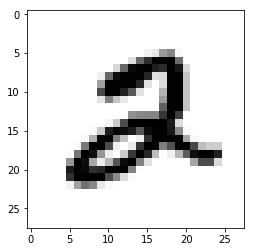

In [123]:
digit = train_images[5]

import matplotlib.pyplot as plt
plt.imshow(digit, cmap=plt.cm.binary)
plt.show()

In [124]:
train_labels[5]

2

In [125]:
from keras import models

In [126]:
from keras import layers

In [127]:
train_images = train_images.reshape(train_images.shape[0], 28, 28, 1)
test_images = test_images.reshape(test_images.shape[0], 28, 28, 1)

train_images = train_images.astype('float32')
test_images = test_images.astype('float32')

train_images/=255
test_images/=255

In [128]:
from keras.utils import to_categorical

train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

In [114]:
test_loss, test_accuracy = model.evaluate(test_images,test_labels)

10000/10000 [==============================] - 63s 6ms/step


In [115]:
print(test_loss)
test_accuracy

0.03535145983552502


0.9887999892234802

In [129]:
model = models.Sequential()

model.add(layers.Conv2D(32, (3, 3), input_shape=(28,28,1)))
model.add(layers.BatchNormalization(axis=-1))
model.add(layers.Activation('relu'))
model.add(layers.Conv2D(32, (3, 3)))
model.add(layers.BatchNormalization(axis=-1))
model.add(layers.Activation('relu'))
model.add(layers.MaxPooling2D(pool_size=(2,2)))

model.add(layers.Conv2D(64,(3, 3)))
model.add(layers.BatchNormalization(axis=-1))
model.add(layers.Activation('relu'))
model.add(layers.Conv2D(64, (3, 3)))
model.add(layers.BatchNormalization(axis=-1))
model.add(layers.Activation('relu'))
model.add(layers.MaxPooling2D(pool_size=(2,2)))

model.add(layers.Flatten())

model.add(layers.Dense(512))
model.add(layers.BatchNormalization())
model.add(layers.Activation('relu'))
model.add(layers.Dropout(0.2))
model.add(layers.Dense(10))

model.add(layers.Activation('softmax'))

In [130]:
model.summary()

Model: "sequential_12"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_16 (Conv2D)           (None, 26, 26, 32)        320       
_________________________________________________________________
batch_normalization_12 (Batc (None, 26, 26, 32)        128       
_________________________________________________________________
activation_14 (Activation)   (None, 26, 26, 32)        0         
_________________________________________________________________
conv2d_17 (Conv2D)           (None, 24, 24, 32)        9248      
_________________________________________________________________
batch_normalization_13 (Batc (None, 24, 24, 32)        128       
_________________________________________________________________
activation_15 (Activation)   (None, 24, 24, 32)        0         
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 12, 12, 32)      

In [131]:
model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

In [113]:
model.fit(train_images, train_labels, epochs=2, batch_size=32)

Epoch 1/2
52128/60000 [=========================>....] - ETA: 2:31 - loss: 0.0965 - accuracy: 0.9701

KeyboardInterrupt: 

In [132]:
from keras.preprocessing.image import ImageDataGenerator

In [133]:
train_gen = ImageDataGenerator(rotation_range=8, width_shift_range=0.08, shear_range=0.3,
                         height_shift_range=0.08, zoom_range=0.08)

test_gen = ImageDataGenerator()

In [134]:
train_generator = train_gen.flow(train_images, train_labels, batch_size=32)
test_generator = test_gen.flow(test_images, test_labels, batch_size=32)

In [136]:
model.fit_generator(train_generator, steps_per_epoch=60000//32, epochs=2, 
                    validation_data=test_generator, validation_steps=10000//32)

Epoch 1/2
 517/1875 [=======>......................] - ETA: 21:42 - loss: 0.2299 - accuracy: 0.9267

KeyboardInterrupt: 

In [ ]:
score = model.evaluate(test_images, test_labels)

 9184/10000 [==========================>...] - ETA: 11s

In [ ]:
print(score[0])
score[1]